In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from util import get_stock, bin_data, split_data

In [2]:
def test_stock(stock, restrict=100, bin_size=365):

    # Get the stock data
    df, restricted_df, index = get_stock(stock[1], stock[2], stock[0], restrict)

    # Create bins
    bins = bin_data(df, bin_size)

    # Split the data
    X_train, y_train, X_test, y_test, train_index, test_index, train_size, test_size = split_data(bins, df, index, bin_size)

    # Run the linear model
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = np.floor(model.predict(X_test))
    y_test = np.floor(y_test)

    ''' Auto-regressive '''
    # Feed the predictions back into the input vector and continue testing
    running_bin = bins[-1].copy()
    next_predictions = []
    for i in range(restrict): # predict the next 100 days
        prediction = model.predict([running_bin])
    
        # feed the prediction back into the input
        running_bin[:-1] = running_bin[1:]
        running_bin[-1] = prediction[0]
    
        # store predictions
        next_predictions.append(prediction[0])
    
    # print(next_predictions[-10:])
    days = np.arange(1, len(next_predictions) + 1)
    
    
    plt.figure()
    plt.title(f"{stock[0]} stock")
    plt.plot(days, next_predictions, label = "Auto-Regressive")
    plt.plot(days, restricted_df, label = f"Actual")
    plt.xlabel(f"Days")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

In [3]:
# Define parameters
stock, restrict, bin_size = ['^GSPC', '1980-01-01', '2024-10-01'], 100, 365

# Get the stock data, makes bins, and split the data
df, restricted_df, index = get_stock(stock[1], stock[2], stock[0], restrict)
bins = bin_data(df, bin_size)
X_train, y_train, X_test, y_test, train_index, test_index, train_size, test_size = split_data(bins, df, index, bin_size)

[*********************100%***********************]  1 of 1 completed


# Train

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Test

In [5]:
# now we make some predictions
y_pred = np.floor(model.predict(X_test))
y_test = np.floor(y_test)
print(y_pred.shape, y_test.shape)

for i in range(math.floor(len(y_pred) * 0.01)):
    print("prediction:", y_pred[i], "| actual:", y_test[i], "| difference:", abs(y_pred[i] - y_test[i]))
# print(y_pred)
print(X_test.shape)

(2163,) (2163,)
prediction: 1925.0 | actual: 1923.0 | difference: 2.0
prediction: 1919.0 | actual: 1951.0 | difference: 32.0
prediction: 1943.0 | actual: 1987.0 | difference: 44.0
prediction: 1984.0 | actual: 1979.0 | difference: 5.0
prediction: 1976.0 | actual: 1995.0 | difference: 19.0
prediction: 1995.0 | actual: 2013.0 | difference: 18.0
prediction: 2015.0 | actual: 2014.0 | difference: 1.0
prediction: 2021.0 | actual: 2017.0 | difference: 4.0
prediction: 2020.0 | actual: 2003.0 | difference: 17.0
prediction: 1992.0 | actual: 1994.0 | difference: 2.0
prediction: 1990.0 | actual: 2023.0 | difference: 33.0
prediction: 2018.0 | actual: 2033.0 | difference: 15.0
prediction: 2038.0 | actual: 2033.0 | difference: 5.0
prediction: 2030.0 | actual: 2030.0 | difference: 0.0
prediction: 2029.0 | actual: 2018.0 | difference: 11.0
prediction: 2025.0 | actual: 2052.0 | difference: 27.0
prediction: 2052.0 | actual: 2075.0 | difference: 23.0
prediction: 2076.0 | actual: 2071.0 | difference: 5.0
pr

# Results
As can be seen, the results are relatively close to the actual values if we adjust for a small margin of error.

(8652,) (2163,)


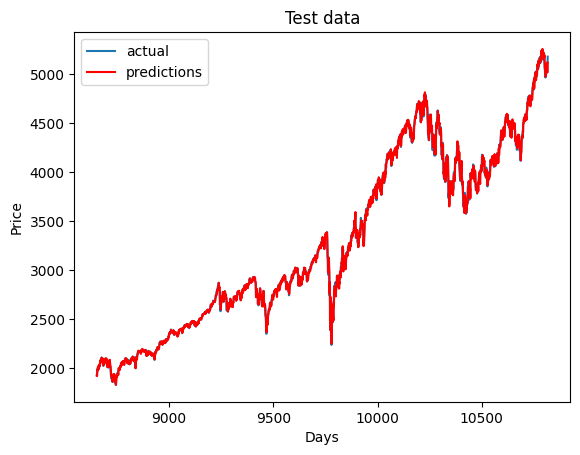

Correctly Classified: 1842/2163
Accuracy: 85.15950069348128%, error_margin of $50
Correctly Classified: 2105/2163
Accuracy: 97.31853906611188%, error_margin of $100


In [6]:
print(train_index.shape, test_index.shape)
plt.plot(test_index, y_test, label="actual")
plt.plot(test_index, y_pred, color="red", label="predictions")
plt.title("Test data")
plt.ylabel("Price")
plt.xlabel("Days")
plt.legend()
plt.show()

error_margin = 50
results = abs(y_pred - y_test) <= error_margin
print(f"Correctly Classified: {np.sum(results)}/{len(results)}")
print(f"Accuracy: {100 * np.sum(results) / len(results)}%, error_margin of ${error_margin}")

error_margin = 100
results = abs(y_pred - y_test) <= error_margin
print(f"Correctly Classified: {np.sum(results)}/{len(results)}")
print(f"Accuracy: {100 * np.sum(results) / len(results)}%, error_margin of ${error_margin}")

In [7]:
print(f"Tomorrows Price: {y_pred[-1]}")
print(y_pred[-15:])
print(y_test[-15:])

Tomorrows Price: 5120.0
[5079. 5058. 5028. 5020. 4976. 5003. 5042. 5079. 5030. 5101. 5112. 5049.
 5018. 5070. 5120.]
[5051. 5022. 5011. 4967. 5010. 5070. 5071. 5048. 5099. 5116. 5035. 5018.
 5064. 5127. 5180.]


[*********************100%***********************]  1 of 1 completed


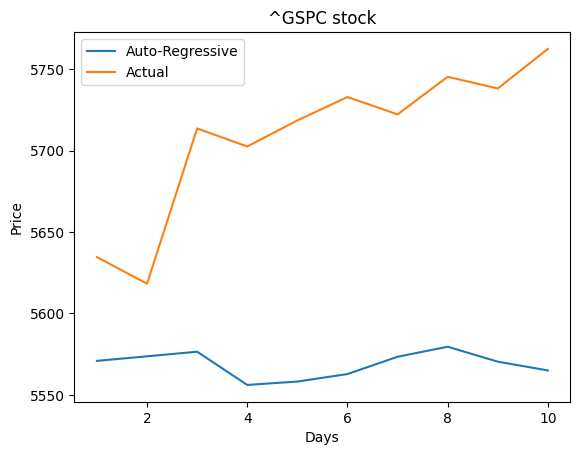

[*********************100%***********************]  1 of 1 completed


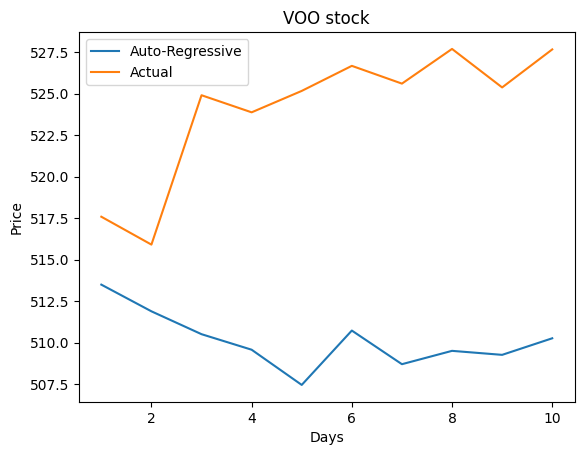

[*********************100%***********************]  1 of 1 completed


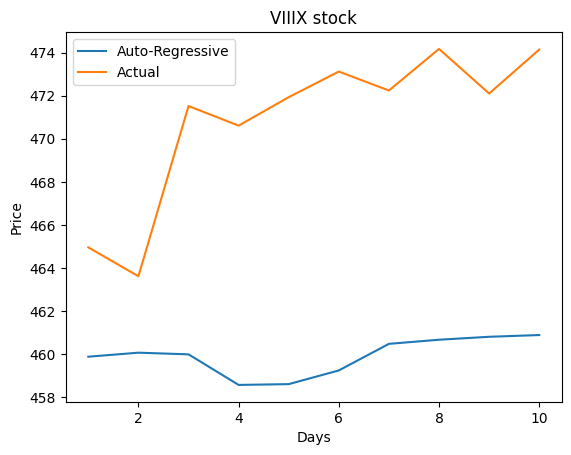

[*********************100%***********************]  1 of 1 completed


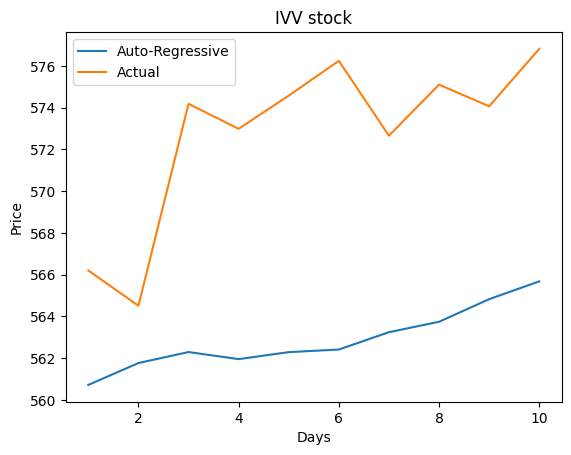

[*********************100%***********************]  1 of 1 completed


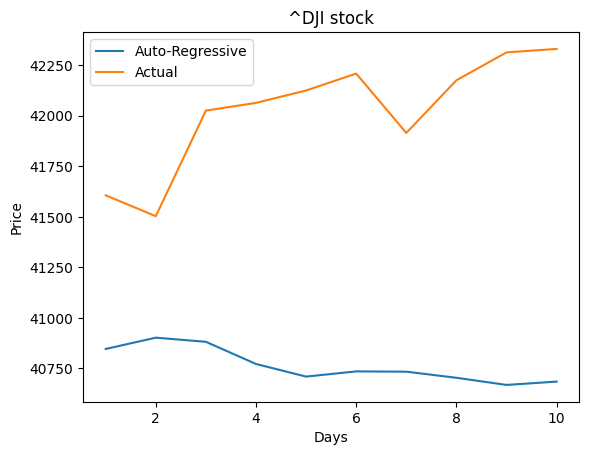

In [8]:
stock = [['^GSPC', '1980-01-01', '2024-10-01'],
        ['VOO', '1980-01-01', '2024-10-01'],
        ['VIIIX', '1980-01-01', '2024-10-01'],
        ['IVV', '1980-01-01', '2024-10-01'],
        ['^DJI', '1980-01-01', '2024-10-01']]
for i in stock:
    test_stock(i, restrict=10)